## 1. Introduction

#### 
My client is looking to invest in restaurant business in the province of Alberta, Canada. My client is new in the country frm Indonesia and looking for recommendation of the best location to build a specialised restaurant. Our location of interest will be a densely populated area with few restaurant business around to minimize competition. 
In this project, we would compare the two most populated city/borough in Alberta using data science methodology. Neighborhood in each city will be explored to determine best location for a new restaurant. 
 As they say in food business, location is KEY. So, project will be looking at best location to open a restaurant in the province.


## Business Problem/Challenge:

### The challenge is to find a suitable neighborhood in any borough in Alberta where the restaurant will thrive. Location of interest will be a densely populated area with few or no restaurants

## 2. Data

### 
To provide my client with necessary information, I will be looking at 
1.	Top 10 Neighborhoods with the highest number of population in the top 2 boroughs
2.	Borough  with significant population to support the business
3.	In selected neighborhood, Toprestaurants  types will be assessed to see if there is opportunity for my client in any of the neighborhood.
4.	I will be combining different data set from the web. 
5.	Alberta data: https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_T
6.	Canada Census Data : https://www12.statcan.gc.ca/census-recensement/2016/dp-pd/hlt-fst/pd-pl/Table.cfm?Lang=Eng&T=1201&SR=1&S=22&O=A&RPP=9999&PR=0
7.	Foursquare API will be used to explore neighborhoods




## 3. Methodology


•	Using pandas to scrape and explore the Alberta dataset from above website, an html file that contains Canada postcode, borough, neighborhoods and Long/lat.

•	Also, I will bring in the Canadian population information html file and merge it with the Alberta data frame.


•	I will extract the top two populated boroughs/city in the data frame and utilize foursquare API to explore each of their neighborhoods separetly.

•	I will use K-means to cluster and segment their neighborhoods into 4 clusters and visualize the cluster on a Map using the Folium Library.

•	I will also explore the top 10 neighborhoods with the highest number of restaurants using the foursquare API and visualize as well.

•	 Top 5 restaurants in the neighborhoods will be assesses and will present my findings based on the results.


### Importing necessary Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# import folium libraries
! pip install folium
import folium

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

In [4]:
import pandas as pd
!conda install --yes lxml

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - lxml


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.24  |                0         125 KB
    certifi-2020.6.20          |           py36_0         156 KB
    libxslt-1.1.33             |       h7d1a2b0_0         426 KB
    lxml-4.5.0                 |   py36hefd8a0e_0         1.4 MB
    openssl-1.1.1g             |       h7b6447c_0         2.5 MB
    ------------------------------------------------------------
                                           Total:         4.6 MB

The following NEW packages will be INSTALLED:

  libxslt            pkgs/main/linux-64::libxslt-1.1.33-h7d1a2b0_0
  lxml               pkgs/main/linux-64::lxml-4.5.0-py36hefd8a0e_0

The following packages will be UPDATED:

  ca-certificates    conda-forge

### Exploring Alberta Dataset , html file that contains Alberta postal code, borough, Neighborhoods and lat_Long

In [5]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_T'
df = pd.read_html(url)
df = pd.DataFrame(df[1]) 
df.head(10)   

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,T1A,Medicine Hat,Central Medicine Hat,50.036460,-110.679250
1,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.049680,-113.964320
2,T3A,Calgary,"Dalhousie, Edgemont, Hamptons, Hidden Valley",51.126060,-114.143158
3,T4A,Airdrie,East Airdrie,51.272450,-113.986980
4,T5A,Edmonton,"West Clareview, East Londonderry",53.5899,-113.4413
5,T6A,Edmonton,North Capilano,53.5483,-113.408
6,T7A,Drayton Valley,Not assigned,53.2165,-114.9893
7,T8A,Sherwood Park,West Sherwood Park,53.519,-113.3216
8,T9A,Wetaskiwin,Not assigned,52.9741,-113.3646
9,T1B,Medicine Hat,South Medicine Hat,50.0172,-110.651



### Data clean up to take out rows whose Borough is not "Not assigned", then reset the indices


In [6]:
df =df[df.Neighborhood != 'Not assigned'].reset_index(drop=True)
df.head(10)

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,T1A,Medicine Hat,Central Medicine Hat,50.036460,-110.679250
1,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.049680,-113.964320
2,T3A,Calgary,"Dalhousie, Edgemont, Hamptons, Hidden Valley",51.126060,-114.143158
3,T4A,Airdrie,East Airdrie,51.272450,-113.986980
4,T5A,Edmonton,"West Clareview, East Londonderry",53.5899,-113.4413
5,T6A,Edmonton,North Capilano,53.5483,-113.408
6,T8A,Sherwood Park,West Sherwood Park,53.519,-113.3216
7,T1B,Medicine Hat,South Medicine Hat,50.0172,-110.651
8,T2B,Calgary,"Forest Lawn, Dover, Erin Woods",51.0318,-113.9786
9,T3B,Calgary,"Montgomery, Bowness, Silver Springs, Greenwood",51.0809,-114.1616


###### As seen "Not assigned" Neigbourhood has been dropped

### Canadian Population Information

In [7]:
html ="https://www12.statcan.gc.ca/census-recensement/2016/dp-pd/hlt-fst/pd-pl/Table.cfm?Lang=Eng&T=1201&SR=1&S=22&O=A&RPP=9999&PR=0"
df_Canada_Population = pd.read_html(html, header=0)[0]
df_Canada_Population.head()

,Geographic name,"Population, 2016","Total private dwellings, 2016","Private dwellings occupied by usual residents, 2016"
0,NaN,NaN,NaN,NaN
1,CanadaFootnote 1,35151728.0,15412443.0,14072079.0
2,A0A,46587.0,26155.0,19426.0
3,A0B,19792.0,13658.0,8792.0
4,A0C,12587.0,8010.0,5606.0



#### Merge dataframe with population with Alberta neighborhoods


In [8]:
df_Alberta=df.merge(df_Canada_Population, left_on='Postal Code',right_on='Geographic name')
df_Alberta.drop(columns = ['Geographic name','Total private dwellings, 2016','Private dwellings occupied by usual residents, 2016'], inplace=True)
df_Alberta.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,"Population, 2016"
0,T1A,Medicine Hat,Central Medicine Hat,50.036460,-110.679250,25409.0
1,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.049680,-113.964320,59641.0
2,T3A,Calgary,"Dalhousie, Edgemont, Hamptons, Hidden Valley",51.126060,-114.143158,53224.0
3,T4A,Airdrie,East Airdrie,51.272450,-113.986980,16054.0
4,T5A,Edmonton,"West Clareview, East Londonderry",53.5899,-113.4413,35049.0


#### Rename last Column 

In [9]:
df_Alberta=df_Alberta.rename({'Population, 2016':'Population'}, axis=1)
df_Alberta.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Population
0,T1A,Medicine Hat,Central Medicine Hat,50.036460,-110.679250,25409.0
1,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.049680,-113.964320,59641.0
2,T3A,Calgary,"Dalhousie, Edgemont, Hamptons, Hidden Valley",51.126060,-114.143158,53224.0
3,T4A,Airdrie,East Airdrie,51.272450,-113.986980,16054.0
4,T5A,Edmonton,"West Clareview, East Londonderry",53.5899,-113.4413,35049.0


#### Drop Postal code column and sort value by population

In [10]:
df_ALBERTA=df_Alberta.drop(columns=['Postal Code']).sort_values('Population', ascending=False).reset_index(drop=True)

df_ALBERTA.head()

,Borough,Neighborhood,Latitude,Longitude,Population
0,Calgary,"Sandstone, MacEwan Glen, Beddington, Harvest H...",51.127,-114.0787,80792.0
1,Calgary,"Martindale, Taradale, Falconridge, Saddle Ridge",51.0999,-113.9422,77605.0
2,Calgary,"Discovery Ridge, Signal Hill, West Springs, Ch...",51.0566,-114.1815,71251.0
3,Edmonton,"West Jasper Place, West Edmonton Mall",53.5157,-113.6339,69914.0
4,Calgary,"Douglas Glen, McKenzie Lake, Copperfield, East...",50.9023,-113.9873,68438.0


In [17]:
df_A = df_ALBERTA.groupby(['Borough']).sum()
df_A.head(10)

,Population
Borough,
Airdrie,64602.0
Calgary,1249824.0
Edmonton,932650.0
Fort McMurray,69667.0
Grande Prairie,72646.0
Leduc,31710.0
Lethbridge,96277.0
Medicine Hat,67569.0
Red Deer,102877.0


In [16]:
df_A.sort_values('Population',ascending=False)

,Population
Borough,
Calgary,1249824.0
Edmonton,932650.0
Red Deer,102877.0
Sherwood Park,96569.0
Lethbridge,96277.0
Grande Prairie,72646.0
Fort McMurray,69667.0
Medicine Hat,67569.0
Airdrie,64602.0


### As seen above , Calgary and Edmonton are the 2 Biggest Borough by population

### Therefore. we will explore the 2  major city

##### Exploring Calgary -Generating dataset whose Borough= 'Calgary'

In [18]:
df_ALBERTA.shape

(98, 5)

In [20]:
index =list()
for i in range (98):
    if 'Calgary' in df_ALBERTA.iloc[i,0]:
        index.append(i)
Calgary_Neigh= df_ALBERTA.loc[index].reset_index(drop=True)
Calgary_Neigh.head(35)

,Borough,Neighborhood,Latitude,Longitude,Population
0,Calgary,"Sandstone, MacEwan Glen, Beddington, Harvest H...",51.127,-114.0787,80792.0
1,Calgary,"Martindale, Taradale, Falconridge, Saddle Ridge",51.0999,-113.9422,77605.0
2,Calgary,"Discovery Ridge, Signal Hill, West Springs, Ch...",51.0566,-114.1815,71251.0
3,Calgary,"Douglas Glen, McKenzie Lake, Copperfield, East...",50.9023,-113.9873,68438.0
4,Calgary,"Millrise, Somerset, Bridlewood, Evergreen",50.9093,-114.0721,61344.0
5,Calgary,"Penbrooke Meadows, Marlborough",51.049680,-113.964320,59641.0
6,Calgary,"Hawkwood, Arbour Lake, Citadel, Ranchlands, Ro...",51.1147,-114.1796,59025.0
7,Calgary,"Rundle, Whitehorn, Monterey Park",51.0759,-114.0015,57237.0
8,Calgary,"Dalhousie, Edgemont, Hamptons, Hidden Valley",51.126060,-114.143158,53224.0
9,Calgary,"Queensland, Lake Bonavista, Willow Park, Acadia",50.9693,-114.0514,46394.0


In [23]:
Calgary_Neigh.shape

(35, 5)

##### Exploring Edmonton   -Generating dataset whose Borough= 'Edmonton'

In [24]:
index =list()
for i in range (98):
    if 'Edmonton' in df_ALBERTA.iloc[i,0]:
      index.append(i)
Edmonton_Neigh= df_ALBERTA.loc[index].reset_index(drop=True)
Edmonton_Neigh.head(30)

,Borough,Neighborhood,Latitude,Longitude,Population
0,Edmonton,"West Jasper Place, West Edmonton Mall",53.5157,-113.6339,69914.0
1,Edmonton,East Mill Woods,53.4681,-113.4339,51562.0
2,Edmonton,Heritage Valley,53.4129,-113.4957,50904.0
3,Edmonton,"Kaskitayo, Aspen Gardens",53.4822,-113.5269,47109.0
4,Edmonton,"Horse Hill, East Lake District",53.6026,-113.3837,45947.0
5,Edmonton,"Southgate, North Riverbend",53.4839,-113.5227,45145.0
6,Edmonton,East Castledowns,53.6072,-113.5183,41912.0
7,Edmonton,The Meadows,53.4768,-113.3662,37150.0
8,Edmonton,Ellerslie,53.4154,-113.4917,35649.0
9,Edmonton,"West Clareview, East Londonderry",53.5899,-113.4413,35049.0


In [25]:
#Find the size of the Edmonton dataframe
Edmonton_Neigh.shape

(38, 5)

#### Top 30 Neighborhood in both Borough has over 10,000 population

### merging the data frames of both Edmonton and calgary

In [26]:
# Cocatenate the dataframes of Calgary and Edmonton
Calgary_Edmonton = pd.concat([Calgary_Neigh, Edmonton_Neigh], join='inner').reset_index(drop=True)
Calgary_Edmonton.head(60)

,Borough,Neighborhood,Latitude,Longitude,Population
0,Calgary,"Sandstone, MacEwan Glen, Beddington, Harvest H...",51.127,-114.0787,80792.0
1,Calgary,"Martindale, Taradale, Falconridge, Saddle Ridge",51.0999,-113.9422,77605.0
2,Calgary,"Discovery Ridge, Signal Hill, West Springs, Ch...",51.0566,-114.1815,71251.0
3,Calgary,"Douglas Glen, McKenzie Lake, Copperfield, East...",50.9023,-113.9873,68438.0
4,Calgary,"Millrise, Somerset, Bridlewood, Evergreen",50.9093,-114.0721,61344.0
5,Calgary,"Penbrooke Meadows, Marlborough",51.049680,-113.964320,59641.0
6,Calgary,"Hawkwood, Arbour Lake, Citadel, Ranchlands, Ro...",51.1147,-114.1796,59025.0
7,Calgary,"Rundle, Whitehorn, Monterey Park",51.0759,-114.0015,57237.0
8,Calgary,"Dalhousie, Edgemont, Hamptons, Hidden Valley",51.126060,-114.143158,53224.0
9,Calgary,"Queensland, Lake Bonavista, Willow Park, Acadia",50.9693,-114.0514,46394.0


In [65]:
Calgary_Edmonton.shape

(73, 5)

## making sure "Not assigned" is not in the dataframe

In [27]:
Calgary_Edmonton =Calgary_Edmonton[Calgary_Edmonton.Latitude != 'Not assigned'].reset_index(drop=True)
Calgary_Edmonton.tail(50)

,Borough,Neighborhood,Latitude,Longitude,Population
22,Calgary,"Rosscarrock, Westgate, Wildwood, Shaganappi, S...",51.0388,-114.098,23519.0
23,Calgary,"Forest Lawn, Dover, Erin Woods",51.0318,-113.9786,23418.0
24,Calgary,"Mount Pleasant, Capitol Hill, Banff Trail",51.0696,-114.0862,21086.0
25,Calgary,"Lynnwood Ridge, Ogden, Foothills Industrial, G...",50.9878,-114.0001,20406.0
26,Calgary,Symons Valley,51.1793,-114.1333,15578.0
27,Calgary,"Elbow Park, Britannia, Parkhill, Mission",51.0171,-114.0812,14637.0
28,Calgary,"Inglewood, Burnsland, Chinatown, East Victoria...",51.0415,-114.0599,14370.0
29,Calgary,"Brentwood, Collingwood, Nose Hill",51.0917,-114.1127,14214.0
30,Calgary,"Connaught, West Victoria Park",51.0426,-114.0791,13879.0
31,Calgary,"City Centre, Calgary Tower",51.0472,-114.0802,13056.0


In [28]:
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim 

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.0.0-pyh9f0ad1d_0

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    pkgs/main::ca-certificates-2020.6.24-0 --> conda-forge::ca-certificates-2020.6.20-hecda079_0
  certifi               pkgs/main::certifi-2020.6.20-py36

#### Analysis Section

#### Let's derive additional information from our data. We would explore each neighborhoods and their corresponding venues

### 
Define Foursquare credentials: #### Exploring AND Segmenting Neighborhood Using Foursquare Credentials

In [29]:
CLIENT_ID = 'IKI3ROSK1J4JZLGOSGP5435TNDRNUQC3VDXPHGQIIIDCJERM' # your Foursquare ID
CLIENT_SECRET = 'EXBEBNMYNF0V2OCPOMFWNF0ONCWISXNUUVM1ZMD1FW025EN2' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: IKI3ROSK1J4JZLGOSGP5435TNDRNUQC3VDXPHGQIIIDCJERM
CLIENT_SECRET:EXBEBNMYNF0V2OCPOMFWNF0ONCWISXNUUVM1ZMD1FW025EN2


#### create a function to get top 100 venue info for each neighborhoods in ALBERTA

In [30]:
LIMIT = 100

radius = 500

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                             'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues) 

In [31]:
Calgary_Edmonton_venues = getNearbyVenues(names=Calgary_Edmonton['Neighborhood'],
                                   latitudes=Calgary_Edmonton['Latitude'],
                                   longitudes=Calgary_Edmonton['Longitude']
                                  )

Sandstone, MacEwan Glen, Beddington, Harvest Hills, Coventry Hills, Panorama Hills
Martindale, Taradale, Falconridge, Saddle Ridge
Discovery Ridge, Signal Hill, West Springs, Christie Estates, Patterson, Cougar Ridge
Douglas Glen, McKenzie Lake, Copperfield, East Shepard
Millrise, Somerset, Bridlewood, Evergreen
Penbrooke Meadows, Marlborough
Hawkwood, Arbour Lake, Citadel, Ranchlands, Royal Oak, Rocky Ridge
Rundle, Whitehorn, Monterey Park
Dalhousie, Edgemont, Hamptons, Hidden Valley
Queensland, Lake Bonavista, Willow Park, Acadia
Midnapore, Sundance
Braeside, Cedarbrae, Woodbine
Lakeview, Glendale, Killarney, Glamorgan
Cranston, Auburn Bay, Mahogany
Montgomery, Bowness, Silver Springs, Greenwood
Thorncliffe, Tuxedo Park
Bridgeland, Greenview, Zoo, YYC
Oak Ridge, Haysboro, Kingsland, Kelvin Grove, Windsor Park
Tuscany, Scenic Acres
South Calgary (Altadore / Bankview / Richmond)
Kensington, Westmont, Parkdale, University
Northwest Calgary
Rosscarrock, Westgate, Wildwood, Shaganappi, Su

In [32]:
Calgary_Edmonton_venues.shape

(654, 7)

#### Let's check how many venues were returned for each neighborhood

In [33]:
Calgary_Edmonton_venues_count=Calgary_Edmonton_venues.groupby('Neighborhood').count()
Calgary_Edmonton_venues_count

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Braeside, Cedarbrae, Woodbine",8,8,8,8,8,8
"Brentwood, Collingwood, Nose Hill",1,1,1,1,1,1
"Bridgeland, Greenview, Zoo, YYC",26,26,26,26,26,26
Central Beverly,4,4,4,4,4,4
Central Bonnie Doon,5,5,5,5,5,5
...,...,...,...,...,...,...
West Lake District,21,21,21,21,21,21
"West Londonderry, East Calder",10,10,10,10,10,10
West Mill Woods,2,2,2,2,2,2


#### Sort dataframe by venues in descending order

In [34]:
Calgary_Edmonton_venues_count_sorted=Calgary_Edmonton_venues_count.sort_values('Venue', ascending=False)
Calgary_Edmonton_venues_count_sorted.head(20)

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
North Downtown,100,100,100,100,100,100
"Inglewood, Burnsland, Chinatown, East Victoria Park, Saddledome",56,56,56,56,56,56
"Connaught, West Victoria Park",43,43,43,43,43,43
"Oak Ridge, Haysboro, Kingsland, Kelvin Grove, Windsor Park",37,37,37,37,37,37
"City Centre, Calgary Tower",27,27,27,27,27,27
"Bridgeland, Greenview, Zoo, YYC",26,26,26,26,26,26
West Lake District,21,21,21,21,21,21
"Rosscarrock, Westgate, Wildwood, Shaganappi, Sunalta",20,20,20,20,20,20
"West Northwest Industrial, Winterburn",20,20,20,20,20,20


#### Let's find out how many unique categories can be curated from all the returned venues

In [35]:
print('There are {} uniques categories for Calgary_Edmonton.'.format(len(Calgary_Edmonton_venues['Venue Category'].unique())))

There are 181 uniques categories for Calgary_Edmonton.


In [36]:
#3 Displaying the 1st 5 venues
Calgary_Edmonton_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Sandstone, MacEwan Glen, Beddington, Harvest H...",51.127,-114.0787,Madison's Restaurant And Bar,51.126872,-114.072997,Italian Restaurant
1,"Sandstone, MacEwan Glen, Beddington, Harvest H...",51.127,-114.0787,Boston Pizza,51.125648,-114.072464,Pizza Place
2,"Sandstone, MacEwan Glen, Beddington, Harvest H...",51.127,-114.0787,Starbucks,51.127154,-114.073565,Coffee Shop
3,"Sandstone, MacEwan Glen, Beddington, Harvest H...",51.127,-114.0787,TD Canada Trust Branch and ATM,51.125730,-114.073270,Bank
4,"Sandstone, MacEwan Glen, Beddington, Harvest H...",51.127,-114.0787,London Drugs,51.127021,-114.074396,Pharmacy


#### Restaurant venues ONLY in the neighborhoods

In [37]:
Calgary_Edmonton_venues_Restaurant = Calgary_Edmonton_venues[Calgary_Edmonton_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
Calgary_Edmonton_venues_Restaurant.index = np.arange(1, len(Calgary_Edmonton_venues_Restaurant)+1)
print ( 'The size of the dataframe is ',Calgary_Edmonton_venues_Restaurant.shape)
Calgary_Edmonton_venues_Restaurant.head()

The size of the dataframe is  (159, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,"Sandstone, MacEwan Glen, Beddington, Harvest H...",51.127,-114.0787,Madison's Restaurant And Bar,51.126872,-114.072997,Italian Restaurant
2,"Discovery Ridge, Signal Hill, West Springs, Ch...",51.0566,-114.1815,Treasures of Saigon,51.060721,-114.179830,Vietnamese Restaurant
3,"Douglas Glen, McKenzie Lake, Copperfield, East...",50.9023,-113.9873,Forever Good Asian Cuisine,50.903979,-113.989547,Asian Restaurant
4,"Millrise, Somerset, Bridlewood, Evergreen",50.9093,-114.0721,Moxie's,50.906582,-114.067165,American Restaurant
5,"Dalhousie, Edgemont, Hamptons, Hidden Valley",51.126060,-114.143158,Edgemont City,51.126473,-114.138997,Asian Restaurant


### Grouping Neighborhoods based on the number of venues in restaurant category

###### I will like to know the top 20 neighborhoods with the highest number of restaurants

In [38]:
Top20_Neighbor_with_highest_restaurant = Calgary_Edmonton_venues_Restaurant[['Neighborhood','Venue']].groupby('Neighborhood').count()
Top20_Neighbor_with_highest_restaurant = Top20_Neighbor_with_highest_restaurant.sort_values('Venue', ascending=False).head(20)
Top20_Neighbor_with_highest_restaurant

,Venue
Neighborhood,
North Downtown,29
"Connaught, West Victoria Park",14
"Oak Ridge, Haysboro, Kingsland, Kelvin Grove, Windsor Park",13
"Inglewood, Burnsland, Chinatown, East Victoria Park, Saddledome",13
"Bridgeland, Greenview, Zoo, YYC",11
"City Centre, Calgary Tower",11
"Rosscarrock, Westgate, Wildwood, Shaganappi, Sunalta",8
"West Northwest Industrial, Winterburn",8
The Meadows,7


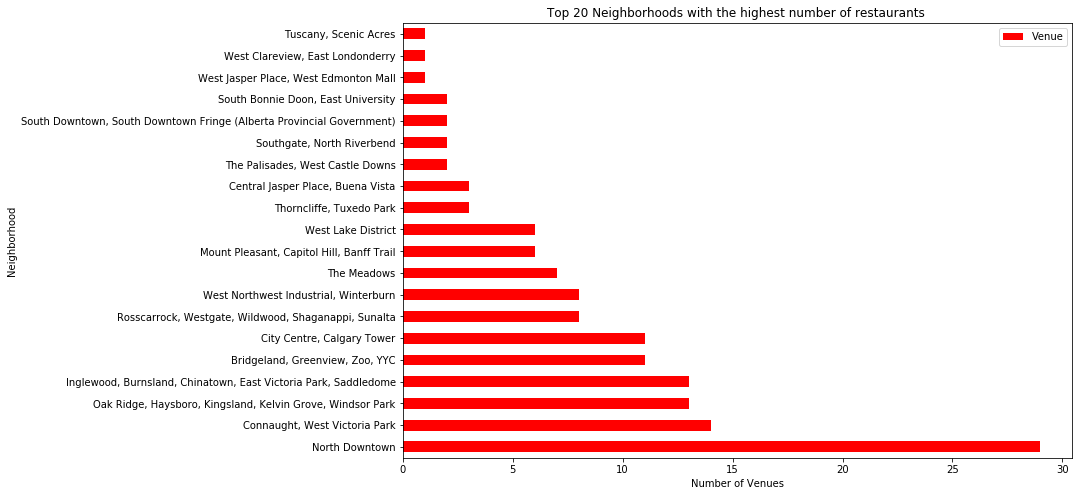

In [39]:
# Plot an horizontal bar graphh to visualize the resulting dataframe
Top20_Neighbor_with_highest_restaurant.plot(kind='barh', figsize=(12, 8), align='center', color='red')
plt.ylabel('Neighborhood')
plt.xlabel('Number of Venues')
plt.title('Top 20 Neighborhoods with the highest number of restaurants ')
plt.show()

##### Based on the plot above, it is obvious that North Downtown in Edmonton has the highest number of restaurants. Since our main targets area are populated area with few competition, Opening a restaurant in Edmonton downtown does not meet the criteria. Like wise , we dont want to open in a neighborhood with too few restaurants. I will consider a neighborhood in the "middle of the pack". Comparing restaurant and total venues for the top 10 neighboorhood shows Inglewood, Burnsland,Chinatown, East victoria Park and Saddledome has the lowest restaurant to venue ratio. Therefore we wil explore this neighborhood further. This could mean the neighborhood is busy but witha fewer restaurants.

Top 10 Neighborhood	Restaurant	Venues	Ratio Restaurant to Venue


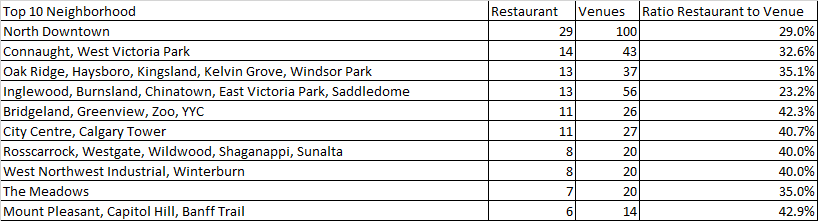

#### We would like to know the top 5 biggest restaurant types in Calgary_Edmonton

In [40]:
Calgary_Edmonton_venues_Restaurant=Calgary_Edmonton_venues_Restaurant[['Venue','Venue Category']].groupby('Venue Category').count().reset_index().sort_values('Venue', ascending=False)
Top_5_Restaurant = Calgary_Edmonton_venues_Restaurant.head()

In [41]:
Top_5_Restaurant = Top_5_Restaurant.set_index('Venue Category')
Top_5_Restaurant

,Venue
Venue Category,
Fast Food Restaurant,22
Restaurant,19
Vietnamese Restaurant,13
Italian Restaurant,10
Asian Restaurant,10


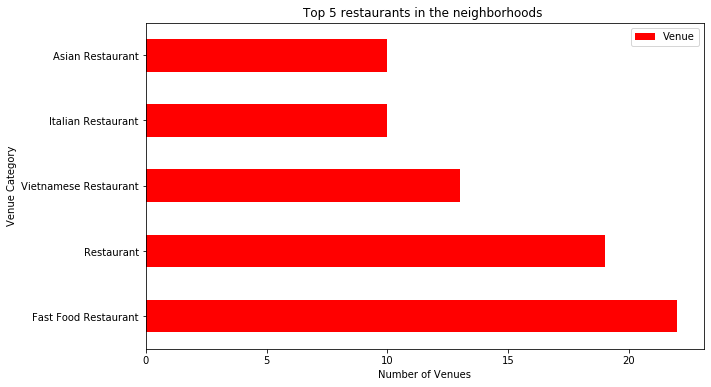

In [42]:
# Plot sn horizontal bar graphh to visualize the resulting dataframe
Top_5_Restaurant.plot(kind='barh', figsize=(10, 6), align='center', color='red')
plt.ylabel('Venue Category')
plt.xlabel('Number of Venues')
plt.title('Top 5 restaurants in the neighborhoods ')
plt.show()

#### Data shows "fast food restaurant" and "restaurant" has highest number of traffic. Since we are not interested in fast food restaurant and data did not specify what type of restaurant is "restaurant", i will focus on Vietnamese Restaurant.

In [43]:

# one hot encoding
Calgary_Edmonton_onehot = pd.get_dummies(Calgary_Edmonton_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighbourhood column back to dataframe
Calgary_Edmonton_onehot['Neighborhood'] = Calgary_Edmonton_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Calgary_Edmonton_onehot.columns[-1]] + list(Calgary_Edmonton_onehot.columns[:-1])
Calgary_Edmonton_onehot = Calgary_Edmonton_onehot[fixed_columns]

Calgary_Edmonton_onehot.head()

,Neighborhood,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,Automotive Shop,BBQ Joint,Bakery,...,Trail,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Warehouse Store,Water Park,Whisky Bar,Wine Shop,Yoga Studio
0,"Sandstone, MacEwan Glen, Beddington, Harvest H...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Sandstone, MacEwan Glen, Beddington, Harvest H...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Sandstone, MacEwan Glen, Beddington, Harvest H...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Sandstone, MacEwan Glen, Beddington, Harvest H...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Sandstone, MacEwan Glen, Beddington, Harvest H...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# let's examine the new dataframe size.
Calgary_Edmonton_onehot.shape

(654, 182)

In [45]:
#Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
Calgary_Edmonton_grouped = Calgary_Edmonton_onehot.groupby('Neighborhood').mean().reset_index()
Calgary_Edmonton_grouped

,Neighborhood,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,Automotive Shop,BBQ Joint,Bakery,...,Trail,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Warehouse Store,Water Park,Whisky Bar,Wine Shop,Yoga Studio
0,"Braeside, Cedarbrae, Woodbine",0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,"Brentwood, Collingwood, Nose Hill",0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,"Bridgeland, Greenview, Zoo, YYC",0.0,0.0,0.0,0.038462,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.038462,0.0,0.0,0.0,0.0,0.0
3,Central Beverly,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,Central Bonnie Doon,0.2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.2,0.0,0.0,0.0,0.000000,0.0,0.2,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,West Lake District,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
65,"West Londonderry, East Calder",0.0,0.0,0.1,0.000000,0.0,0.0,0.0,0.0,0.1,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
66,West Mill Woods,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
67,"West Northwest Industrial, Winterburn",0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.100000,0.0,0.0,0.0,0.0,0.0


In [46]:
# Confirm the new size
Calgary_Edmonton_grouped.shape

(69, 182)

#### Let's print each neighborhood along with the top 5 most common venues

In [47]:
num_top_venues = 5

for hood in Calgary_Edmonton_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Calgary_Edmonton_grouped[Calgary_Edmonton_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Braeside, Cedarbrae, Woodbine----
               venue  freq
0     Ice Cream Shop  0.12
1                Gym  0.12
2  Convenience Store  0.12
3                Pub  0.12
4        Coffee Shop  0.12


----Brentwood, Collingwood, Nose Hill----
                 venue  freq
0    Electronics Store   1.0
1   Miscellaneous Shop   0.0
2  Moroccan Restaurant   0.0
3                Motel   0.0
4      Motorcycle Shop   0.0


----Bridgeland, Greenview, Zoo, YYC----
                  venue  freq
0                  Bank  0.08
1          Dessert Shop  0.04
2           Coffee Shop  0.04
3  Gym / Fitness Center  0.04
4         Grocery Store  0.04


----Central Beverly----
                        venue  freq
0  Construction & Landscaping  0.50
1               Grocery Store  0.25
2                  Smoke Shop  0.25
3         American Restaurant  0.00
4                 Music Store  0.00


----Central Bonnie Doon----
                 venue  freq
0  American Restaurant   0.2
1           Water Park   0.2
2

#### The results for chosen neighborhood (" ) showed that restaurant is not on the top 5 venues in the neighborhood. This reinforces that competition is low for a new restaurant in the neighborhood.

### writing a function to sort the venues in descending order and put into a dataframe

In [48]:
#First, let's write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [64]:
# Now let's create the new dataframe and display the top 10 venues for each neighborhood.
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Calgary_Edmonton_grouped['Neighborhood']

for ind in np.arange(Calgary_Edmonton_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Calgary_Edmonton_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Braeside, Cedarbrae, Woodbine",Pharmacy,Hockey Rink,Pizza Place,Convenience Store,Ice Cream Shop,Pub,Gym,Coffee Shop,Donut Shop,Flower Shop
1,"Brentwood, Collingwood, Nose Hill",Electronics Store,Yoga Studio,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fast Food Restaurant,Falafel Restaurant
2,"Bridgeland, Greenview, Zoo, YYC",Bank,Scenic Lookout,Indian Restaurant,Falafel Restaurant,Sandwich Place,Seafood Restaurant,Middle Eastern Restaurant,Chinese Restaurant,Poke Place,Clothing Store
3,Central Beverly,Construction & Landscaping,Smoke Shop,Grocery Store,Eastern European Restaurant,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fast Food Restaurant
4,Central Bonnie Doon,American Restaurant,Trail,Liquor Store,Cosmetics Shop,Water Park,Arts & Crafts Store,Electronics Store,Forest,Food Truck,Food Court


## Results and Discussion

#### From the graph in fig 1, it is evident that North Downtown in Edmonton has the highest number of restaurants. Based on the fact that Inglewood;Bursland;Chinatown;East victoria;Saddledome  has the lowest restaurant to venue ratio. We could see that despite the fact of having more venues within the neighborhoods, reatuarants countes are low.Also Fig 2 has shown that vietnamese restaurants are popular aside from fast food and non specialised restaurants. In chosen Neighborhood, Italian is the most popular restauarant and vietnamese restaurant is not amongs the top 10 venues. Since Vietnamese restaurant is popular as well, it will be good to open one in a busy neighborhood with less competition.

In [68]:

neighborhoods_venues_sorted.head(50)

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,"Braeside, Cedarbrae, Woodbine",Pharmacy,Hockey Rink,Pizza Place,Convenience Store,Ice Cream Shop,Pub,Gym,Coffee Shop,Donut Shop,Flower Shop
1,0,"Brentwood, Collingwood, Nose Hill",Electronics Store,Yoga Studio,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fast Food Restaurant,Falafel Restaurant
2,0,"Bridgeland, Greenview, Zoo, YYC",Bank,Scenic Lookout,Indian Restaurant,Falafel Restaurant,Sandwich Place,Seafood Restaurant,Middle Eastern Restaurant,Chinese Restaurant,Poke Place,Clothing Store
3,4,Central Beverly,Construction & Landscaping,Smoke Shop,Grocery Store,Eastern European Restaurant,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fast Food Restaurant
4,0,Central Bonnie Doon,American Restaurant,Trail,Liquor Store,Cosmetics Shop,Water Park,Arts & Crafts Store,Electronics Store,Forest,Food Truck,Food Court
5,0,"Central Jasper Place, Buena Vista",Fast Food Restaurant,Convenience Store,Pizza Place,Café,Sandwich Place,Bakery,Sushi Restaurant,Electronics Store,Food Court,Food & Drink Shop
6,0,Central Londonderry,Health & Beauty Service,Yoga Studio,Dry Cleaner,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fast Food Restaurant,Falafel Restaurant
7,0,Central Mistatim,Warehouse Store,Liquor Store,Casino,Yoga Studio,Electronics Store,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market
8,0,"City Centre, Calgary Tower",Restaurant,Sushi Restaurant,Mediterranean Restaurant,Pub,Bakery,Bar,Camera Store,Sandwich Place,Japanese Restaurant,Italian Restaurant
9,0,"Connaught, West Victoria Park",Bar,Coffee Shop,Mediterranean Restaurant,French Restaurant,Restaurant,Pub,Brewery,Middle Eastern Restaurant,Park,Pharmacy


### Conclusion

In the quest to find a neighborhood to open a restaurant , i consider 2 boroughs - Edmonto and Calgary based on their population in Alberta. I examined both cities neighbourhood venues using foursquare and considered top 20 neighbourhoods with the highest number of existing restaurants. The goal is to look for a neighborhood whith potential - good population/activity and less competition. Based on analysed data, the neighbourhood of Inglewood and co was chosen because it has the lowest restaurant to venues ratio amonst the top 10 neighbourhoods. This simply means there is less restaurant compared to number of venues in the neighborhood.

In addition, i analysed what type of restaurant to open? Vietnamese is popular but not popular in the neighborhood chosen. based on my results , i suggest the stakeholders  should open a vietnamese restaurant in Inglewood,Chinatown,East Victoria and Saddledome. There is trafic and less competition in that neighborhood. Also having additional information like the spending power, demographic and income per household in the neighbourhood would strenghten and have a great impact on this project.